## Import

In [131]:
import seaborn as sns;
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as TTS
from sklearn.model_selection import cross_val_score;
from sklearn.preprocessing import LabelEncoder;
from sklearn.ensemble import RandomForestClassifier

# pipeline elements
from sklearn.decomposition import PCA # PCA = Principal Component Analysis
from sklearn.neighbors import KNeighborsClassifier as KNN 

# pipeline materiaux
from sklearn.pipeline import Pipeline # PCA = Principal Component Analysis
from sklearn.model_selection import GridSearchCV

## Collecte de données

In [59]:
# charger le dataset
fd = pd.read_csv('data/Fraud_Data.csv')
ip = pd.read_csv('data/IpAddress_to_Country.csv')

In [60]:
fd.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [61]:
ip.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


In [62]:
ip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [63]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [64]:
fd.dropna()
ip.dropna()
#ip.query("(country == 'China')")

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


In [65]:
# On va parcourir le nombre de ligne contenu dans la dataset fd
# Si l'adresse ip contenu dans la data ip se trouve dans une des plages d'ip de la dataset de fd,
# stocke la ligne dans une variable. Si la ligne est bonne, créé des variable et les ajoute les colonnes en plus 
# des lignes correspondants dans fd.
#
# var: 
#         ligne: va stocker la ligne de l'ip se situant dans la plage d'adresse ip qui nous interesse
#         cou: va stocker le pays par rapport à la l'adresse ip récupéré
#         low: va stocker le lower_bound_ip_address par rapport à la l'adresse ip récupéré
#         up: va stocker le upper_bound_ip_address par rapport à la l'adresse ip récupéré


# Créer une list de la taille de fd
country = len(fd) * [0]                
lower_bound_ip_address = len(fd) * [0]
upper_bound_ip_address = len(fd) * [0]

for ind, row in fd.iterrows():          # Il va parcourir le nombre de ligne contenu dans fd
    ligne = ip[(ip['lower_bound_ip_address'] < row['ip_address']) &              
           (ip['upper_bound_ip_address'] > row['ip_address'])]       
    cou = ligne['country']  
    low = ligne['lower_bound_ip_address']  
    up = ligne['upper_bound_ip_address']  
    
    if len(cou) == 1:                   
        country[ind] = cou.values[0]  
        lower_bound_ip_address[ind] = low.values[0]  
        upper_bound_ip_address[ind] = up.values[0]

fd['country'] = country
fd['lower_bound_ip_address'] = lower_bound_ip_address
fd['upper_bound_ip_address'] = upper_bound_ip_address

In [82]:
fd.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,lower_bound_ip_address,upper_bound_ip_address
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,7.298089e+08,734003199
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,3.355443e+08,352321535
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,2.621440e+09,2621505535
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,0,0.000000e+00,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4.154982e+08,415629311


In [78]:
fd['ip_address'].max()

4294850499.6788397

In [79]:
fd['upper_bound_ip_address'].max()

3758063615

In [80]:
fd.to_csv('data/IpAddress_to_Country_Fraud_Data.csv') # On créé un fichier csv avec toutes nos données

In [517]:
fd_ip = pd.read_csv('data/IpAddress_to_Country_Fraud_Data.csv')

In [518]:
fd_ip = fd_ip[fd_ip.country != '0']

In [519]:
fd_ip

,Unnamed: 0,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country,lower_bound_ip_address,upper_bound_ip_address
0,0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,7.298089e+08,734003199
1,1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,3.355443e+08,352321535
2,2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,2.621440e+09,2621505535
4,4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4.154982e+08,415629311
5,5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,0,Canada,2.809266e+09,2809331711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151106,151106,360761,2015-02-10 06:39:44,2015-06-03 08:18:30,13,EFCFFMUKFRDHJ,SEO,Safari,F,42,8.740657e+08,0,United States,8.724152e+08,889192447
151107,151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,United States,3.451126e+09,3451387903
151108,151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,Netherlands,2.436039e+09,2441084927
151109,151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,Japan,2.748449e+09,2748514303


## Feature Engineering

In [520]:
Y = fd_ip['class'].astype('category').cat.codes # On veut afficher le type de fleur
X = fd_ip.drop('class', axis='columns') # On garde que les dimension de la fleur

In [521]:
X['source'] = LabelEncoder().fit_transform(X['source'])
X['browser'] = LabelEncoder().fit_transform(X['browser'])
X['sex'] = LabelEncoder().fit_transform(X['sex'])
X['country'] = LabelEncoder().fit_transform(X['country'])

In [522]:
X.shape, Y.shape

((129146, 14), (129146,))

In [523]:
# On supprime les colonnes qui nous intéresse pas

X = X.drop(['device_id'],axis=1)
X = X.drop(['signup_time'],axis=1)
X = X.drop(['purchase_time'],axis=1)
X = X.drop(['Unnamed: 0'],axis=1)
# X = X.drop(['country'],axis=1)
# X = X.drop(['upper_bound_ip_address'],axis=1)
# X = X.drop(['lower_bound_ip_address'],axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129146 entries, 0 to 151110
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   user_id                 129146 non-null  int64  
 1   purchase_value          129146 non-null  int64  
 2   source                  129146 non-null  int32  
 3   browser                 129146 non-null  int32  
 4   sex                     129146 non-null  int32  
 5   age                     129146 non-null  int64  
 6   ip_address              129146 non-null  float64
 7   country                 129146 non-null  int32  
 8   lower_bound_ip_address  129146 non-null  float64
 9   upper_bound_ip_address  129146 non-null  int64  
dtypes: float64(2), int32(4), int64(4)
memory usage: 8.9 MB


In [524]:
X

,user_id,purchase_value,source,browser,sex,age,ip_address,country,lower_bound_ip_address,upper_bound_ip_address
0,22058,34,2,0,1,39,7.327584e+08,84,7.298089e+08,734003199
1,333320,16,0,0,0,53,3.503114e+08,171,3.355443e+08,352321535
2,1359,15,2,3,1,53,2.621474e+09,171,2.621440e+09,2621505535
4,221365,39,0,4,1,45,4.155831e+08,171,4.154982e+08,415629311
5,159135,42,0,0,1,18,2.809315e+09,32,2.809266e+09,2809331711
...,...,...,...,...,...,...,...,...,...,...
151106,360761,13,2,4,0,42,8.740657e+08,171,8.724152e+08,889192447
151107,345170,43,2,0,1,28,3.451155e+09,171,3.451126e+09,3451387903
151108,274471,35,2,4,1,32,2.439047e+09,118,2.436039e+09,2441084927
151109,368416,40,2,2,0,26,2.748471e+09,84,2.748449e+09,2748514303


## Entrainer un model

In [525]:
clf = RandomForestClassifier(random_state=0)

In [526]:
X_tr, X_te, Y_tr, Y_te = TTS(X, Y,              # features, target
                            stratify = Y,       # Va prendre une proportion aux hasard de valeurs différentes histoire de ne pas avoir des cas où l'on a que des même valeur
                            random_state=777,   # Sert à fixer le harsard pour ne pas avoir des résultat différents à chaque tests.
                            train_size=0.8)     # 50% de X_train et Y_train et 50% de Y_test et Y_test

In [527]:
clf.fit(X_tr, Y_tr)

RandomForestClassifier(random_state=0)

In [528]:
clf.predict(X_te)

array([0, 0, 0, ..., 0, 0, 0], dtype=int8)

In [529]:
clf.predict_proba(X_te)

array([[0.9 , 0.1 ],
       [0.98, 0.02],
       [0.96, 0.04],
       ...,
       [0.94, 0.06],
       [0.92, 0.08],
       [0.94, 0.06]])

In [530]:
predictions = clf.predict(X_te)

In [531]:
accuracy = lambda p,y: (p==y).sum()/p.shape[0] # Notre fonction de précision

In [532]:
# On cherche à prédir X_tr_PCA par rapport à Y_tr

knn = KNN(n_neighbors=3)
knn.fit(X_tr, Y_tr)
train_preds = knn.predict(X_te)
"TEST ACCURACY: ", accuracy(predictions, Y_te)

('TEST ACCURACY: ', 0.9464576074332172)

In [533]:
train_preds = knn.predict(X_tr)
"TRAIN ACCURACY: ", accuracy(train_preds, Y_tr)

('TRAIN ACCURACY: ', 0.9417224824809323)

## Confusion matrix

In [534]:
X_te.shape, Y_te.shape, X_tr.shape, Y_tr.shape

((25830, 10), (25830,), (103316, 10), (103316,))

In [535]:
# Matrice de confusion 
#
# la matrice de confusion est une matrice qui mesure la qualité d'un système de classification. 
# Chaque ligne correspond à une classe réelle, chaque colonne correspond à une classe estimée. 

(train_preds, Y_tr)
(predictions, Y_te)

from sklearn.metrics import confusion_matrix

labels = range(2)                                             # Equivaut aux valeurs que peut retourner la target
cm_train = confusion_matrix(train_preds, Y_tr, labels=labels)
cm_test = confusion_matrix(predictions, Y_te, labels=labels)

In [536]:
Y.unique()

array([0, 1], dtype=int8)

In [537]:
labels

range(0, 2)

In [538]:
def show_cm(cm, labels):
    df_cm = pd.DataFrame(cm, labels, labels)
    sns.heatmap(df_cm, annot=True)
    plt.show()

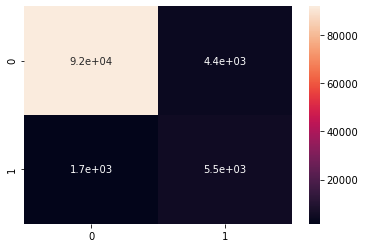

In [539]:
show_cm(cm_train, labels)

In [540]:
cm_train

array([[91841,  4360],
       [ 1661,  5454]], dtype=int64)

In [541]:
cm_test

array([[23247,  1254],
       [  129,  1200]], dtype=int64)

## Feature Importance

In [542]:
# L'importance permet de connaitre l'importance d'une colonne
# par rapport aux autres colonnes.

clf.fit(X_tr, Y_tr)                       # On re-train nos valeurs
importance = clf.feature_importances_   
importance

array([0.15433073, 0.12961673, 0.03024079, 0.03044873, 0.02160526,
       0.11143173, 0.18905858, 0.05768799, 0.13782875, 0.13775071])

In [543]:
# On renomme nos colonnes

name = X_tr.columns.tolist()
name = np.char.replace(name, 'lower_bound_ip_address', 'lower_bound_ip_addr')
name = np.char.replace(name, 'upper_bound_ip_address', 'upper_bound_ip_addr')

Feature ranking:

   user_id: (18.905858)
   purchase_value: (15.433073)
   source: (13.782875)
   browser: (13.775071)
   sex: (12.961673)
   age: (11.143173)
   ip_address: (5.768799)
   country: (3.044873)
   lower_bound_ip_address: (3.024079)
   upper_bound_ip_address: (2.160526)


<Figure size 432x288 with 0 Axes>

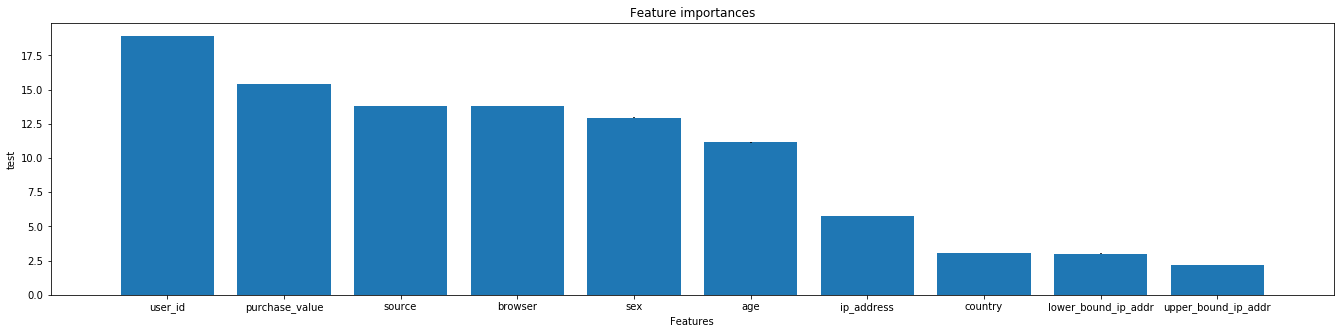

In [544]:
# On souhaite Afficher dans un graphique notre importance

std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importance)[::-1]

# Affichage de nos features avec leur pourcentage
print("Features:")
print()

for f in range(X.shape[1]):
    print("   %s: (%f)" % (X_tr.columns[f], importance[indices[f]]*100))

# Affichage de notre Features importance
plt.figure()
plt.subplots(figsize=(23,5))                                              #Taille de la figure
plt.title("Feature importances")
plt.xlabel('Features')
plt.ylabel('test')
plt.bar(name, importance[indices]*100, yerr=std[indices], align="center") # Valeur en X, Hauteur, Largeur, alignement
plt.xlim([-1, X.shape[1]])                                                # Limite de l'axe X
plt.show()

## Affichage du nombre d'attaque

In [661]:
# L'objectif est d'afficher le Nombre d'attaque en fonction des pays
# On affichera uniquement les 10 pays les plus attaqué

fd_ip_wo_class0 = fd_ip[fd_ip['class'] == 1]              # On s'interessera qu'au attaque qui on eu lieu
country_by_class = pd.DataFrame()                         # On crée un nouveau dataframe
country_by_class['country'] = fd_ip['country']            # On ajoute à notre dataset la colonne country
country_by_class['class'] = fd_ip['class']                # On ajoute à notre dataset la colonne classe
total = country_by_class.groupby(by="country",as_index=False).sum().sort_values(by='class', ascending=False) # On groupe tout nos country en en fonction de la somme de nos class par ordre décroissant

total.head(10)                                            # On affiche le total


,country,class
171,United States,5551
36,China,1043
84,Japan,715
170,United Kingdom,477
88,Korea Republic of,380
32,Canada,348
60,France,300
24,Brazil,270
64,Germany,262
82,Italy,166


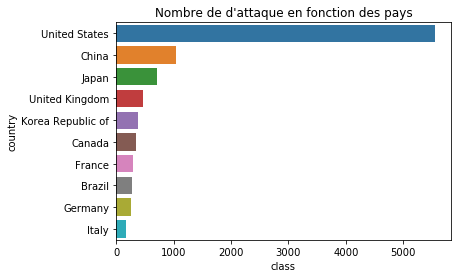

In [664]:
df = total.head(10)

sns.barplot(df['class'], df['country']).set_title("Nombre de d'attaque en fonction des pays");

## Conclusion

La précision des prédictions de nos features sur nos données target est de 0.94 soit 94%. Les résultats obtenu sont donc vrai à 94%. Nous avons pu determiner que la colonne user_id était très importantes par rapport aux colonnes définissant les plages d'adresse.